In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import pandas as pd
import matplotlib.ticker as ticker
from scipy import stats
import itertools

data_dir = path.join("/home/harka424/Documents/COSC490/Stemming/Data","pre-trec")
labels = ["paiceHusk", "krovetz", "sStripping", "porter2", "lovins", "wikt", "none"]
labels_title = ["Paice/Husk", "Krovetz", "S-Stripping", "Porter2", "Lovins", "Wikt", "None"]
collections_shorthand = ["adi", "cacm", "cisi", "cran", "cf", "lisa", "med", "npl", "time"]
collections = ["ADI", "CACM", "CISI", "Cranfield", "CysticFibrosis", "LISA", "Medline", "NPL", "Time"]
MARKERS = ["o","^","s","*","d", "P", "X"]
marker = itertools.cycle(MARKERS)

In [2]:
SMALL_SIZE = 11
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Preparing Data

In [3]:
df_list = list()

for col, collection in zip(collections_shorthand, collections):
    df = pd.read_csv(path.join(data_dir,f"{col}-MAP"),sep="\\s+")
    df["collection"] = collection
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

data_avg = data[data["qid"] == "all"]
data = data.drop(data[data["qid"] == "all"].index)

## MAP

In [4]:
for collection in collections:
    target = data_avg[data_avg["collection"] == collection]
    display(target)

,stemmer,qid,map,collection
35,paiceHusk,all,0.4081,ADI
71,krovetz,all,0.4063,ADI
107,sStripping,all,0.3426,ADI
143,porter2,all,0.4016,ADI
179,lovins,all,0.3964,ADI
215,wikt,all,0.4139,ADI
251,none,all,0.3443,ADI


,stemmer,qid,map,collection
304,paiceHusk,all,0.2975,CACM
357,krovetz,all,0.3050,CACM
410,sStripping,all,0.2918,CACM
463,porter2,all,0.2900,CACM
516,lovins,all,0.2818,CACM
569,wikt,all,0.2806,CACM
622,none,all,0.2661,CACM


,stemmer,qid,map,collection
661,paiceHusk,all,0.2003,CISI
700,krovetz,all,0.1978,CISI
739,sStripping,all,0.1963,CISI
778,porter2,all,0.1915,CISI
817,lovins,all,0.2053,CISI
856,wikt,all,0.1933,CISI
895,none,all,0.2047,CISI


,stemmer,qid,map,collection
1009,paiceHusk,all,0.3195,Cranfield
1123,krovetz,all,0.3282,Cranfield
1237,sStripping,all,0.3069,Cranfield
1351,porter2,all,0.3307,Cranfield
1465,lovins,all,0.3215,Cranfield
1579,wikt,all,0.3135,Cranfield
1693,none,all,0.3021,Cranfield


,stemmer,qid,map,collection
1744,paiceHusk,all,0.3014,CysticFibrosis
1795,krovetz,all,0.2980,CysticFibrosis
1846,sStripping,all,0.2926,CysticFibrosis
1897,porter2,all,0.3028,CysticFibrosis
1948,lovins,all,0.3018,CysticFibrosis
1999,wikt,all,0.3023,CysticFibrosis
2050,none,all,0.2853,CysticFibrosis


,stemmer,qid,map,collection
2082,paiceHusk,all,0.3301,LISA
2114,krovetz,all,0.2997,LISA
2146,sStripping,all,0.2713,LISA
2178,porter2,all,0.2982,LISA
2210,lovins,all,0.2919,LISA
2242,wikt,all,0.3053,LISA
2274,none,all,0.2680,LISA


,stemmer,qid,map,collection
2305,paiceHusk,all,0.4973,Medline
2336,krovetz,all,0.4987,Medline
2367,sStripping,all,0.4944,Medline
2398,porter2,all,0.5059,Medline
2429,lovins,all,0.5105,Medline
2460,wikt,all,0.5001,Medline
2491,none,all,0.4793,Medline


,stemmer,qid,map,collection
2540,paiceHusk,all,0.2396,NPL
2589,krovetz,all,0.2451,NPL
2638,sStripping,all,0.2222,NPL
2687,porter2,all,0.2470,NPL
2736,lovins,all,0.2090,NPL
2785,wikt,all,0.2490,NPL
2834,none,all,0.1732,NPL


,stemmer,qid,map,collection
2877,paiceHusk,all,0.5728,Time
2920,krovetz,all,0.5868,Time
2963,sStripping,all,0.5607,Time
3006,porter2,all,0.5854,Time
3049,lovins,all,0.5876,Time
3092,wikt,all,0.6085,Time
3135,none,all,0.5545,Time


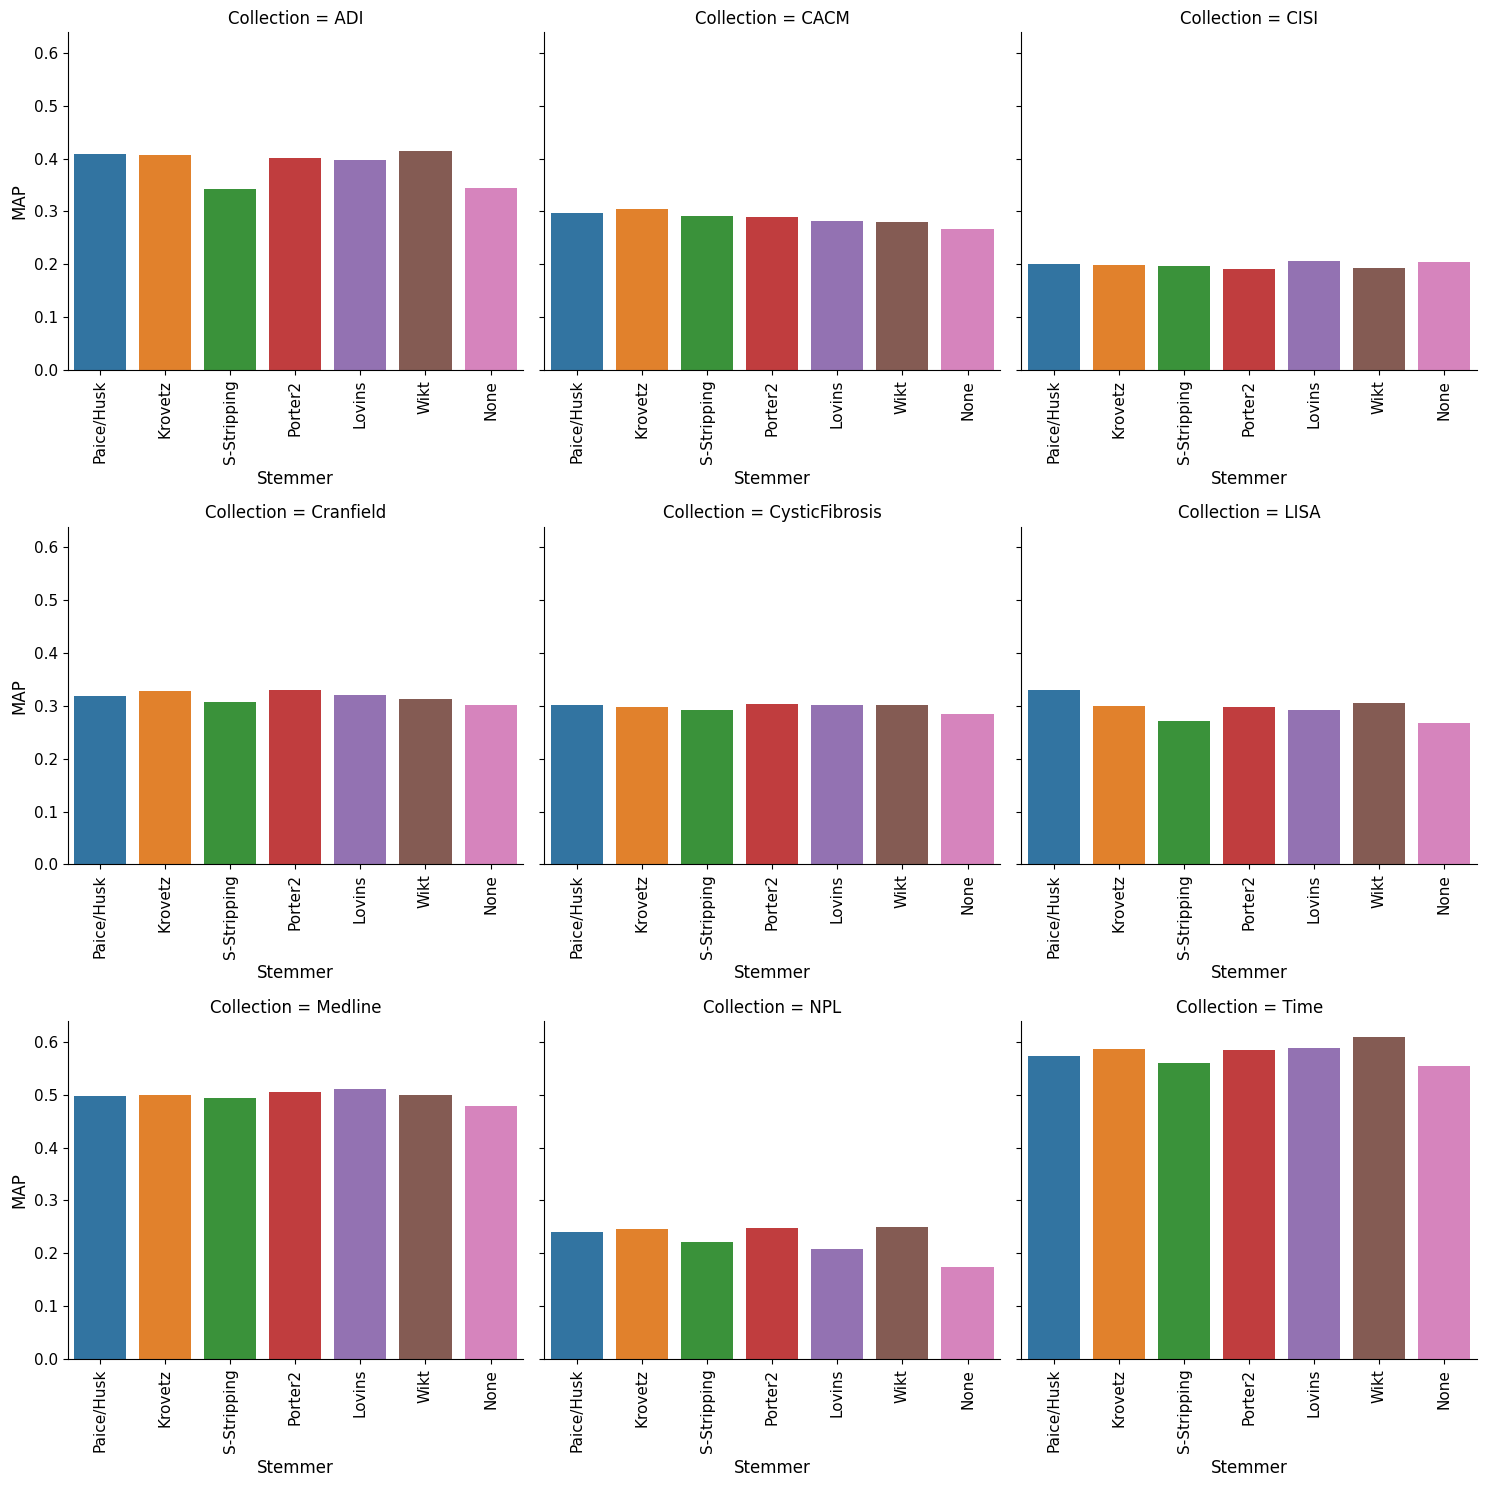

In [10]:
graph = sns.catplot(data=data_avg, kind="bar", x="stemmer", hue="stemmer", y="map", col="collection", col_wrap=3, sharex=False)
graph.set_titles(col_template="Collection = {col_name}")
graph.set(ylabel="MAP",xlabel="Stemmer")
for ax in graph.axes:
    ax.xaxis.set_major_locator(ticker.FixedLocator(ax.get_xticks()))
    ax.set_xticklabels(labels_title)
    ax.tick_params(axis='x',labelrotation=90)
plt.tight_layout()
plt.show()
# axes = sns.catplot(data=data, kind="bar", x="stemmer", hue="stemmer", y="map", col="collection", col_wrap=3, sharex=False)
# plt.show()

## Statistical Significance

### ADI

In [5]:
target_data = data[data["collection"] == "ADI"]

s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=1.5518214210382786, pvalue=0.12996469344123174, df=34)
TtestResult(statistic=1.4261501266117151, pvalue=0.16294300934199507, df=34)
TtestResult(statistic=-0.23457527357603525, pvalue=0.8159453443586175, df=34)
TtestResult(statistic=1.7449239074138156, pvalue=0.09003208489551869, df=34)


### CACM

In [6]:
target_data = data[data["collection"] == "CACM"]

s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=1.2418545378197536, pvalue=0.21997106671357028, df=51)
TtestResult(statistic=1.5122478198065172, pvalue=0.13664323367151343, df=51)
TtestResult(statistic=-0.9250403309766652, pvalue=0.3593014444084677, df=51)
TtestResult(statistic=0.9801145478974522, pvalue=0.33165628288764526, df=51)


### CISI

In [7]:
target_data = data[data["collection"] == "CISI"]

s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=-1.4594605338666937, pvalue=0.15287707037357925, df=37)
TtestResult(statistic=-0.46462788347888473, pvalue=0.6449206098749235, df=37)
TtestResult(statistic=-1.526889532585812, pvalue=0.13529260585933986, df=37)
TtestResult(statistic=-1.3869395284848025, pvalue=0.17375952540773537, df=37)


### Cranfield

In [8]:
target_data = data[data["collection"] == "Cranfield"]

s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=2.7050483810148798, pvalue=0.00789659297011807, df=112)
TtestResult(statistic=1.724166711006267, pvalue=0.08743674323179161, df=112)
TtestResult(statistic=1.6307638378963065, pvalue=0.1057491829006809, df=112)
TtestResult(statistic=0.9459029964253517, pvalue=0.34623432476244786, df=112)


### CysticFibrosis

In [9]:
target_data = data[data["collection"] == "CysticFibrosis"]

s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=2.6822032817363066, pvalue=0.009941663787289126, df=49)
TtestResult(statistic=2.1749157785859663, pvalue=0.03449179832297513, df=49)
TtestResult(statistic=0.43033071225444963, pvalue=0.6688419580584349, df=49)
TtestResult(statistic=2.394643818349015, pvalue=0.020505714967808508, df=49)


### LISA

In [10]:
target_data = data[data["collection"] == "LISA"]

s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=1.940793476087416, pvalue=0.06173095758004569, df=30)
TtestResult(statistic=1.787347987324497, pvalue=0.0839891476638431, df=30)
TtestResult(statistic=-0.9692380797849206, pvalue=0.34017620526490244, df=30)
TtestResult(statistic=2.355485351636764, pvalue=0.02523149470362905, df=30)


### Medline

In [11]:
target_data = data[data["collection"] == "Medline"]

s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=2.3279721973604945, pvalue=0.027094694448056136, df=29)
TtestResult(statistic=1.7237020935165945, pvalue=0.09540892945132863, df=29)
TtestResult(statistic=1.5782768203715678, pvalue=0.12534928858425762, df=29)
TtestResult(statistic=1.66139627043369, pvalue=0.10740854764248106, df=29)


### NPL

In [12]:
target_data = data[data["collection"] == "NPL"]

s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=4.459668308862477, pvalue=5.0877741427013827e-05, df=47)
TtestResult(statistic=3.6760412738225514, pvalue=0.0006069318975103154, df=47)
TtestResult(statistic=0.7730362301795795, pvalue=0.4433714668800117, df=47)
TtestResult(statistic=4.7054115631140325, pvalue=2.26049439784947e-05, df=47)


### Time

In [13]:
target_data = data[data["collection"] == "Time"]

s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=1.4358255335243468, pvalue=0.15863814876738447, df=41)
TtestResult(statistic=1.1604900459839, pvalue=0.2525621749560602, df=41)
TtestResult(statistic=0.7024837127471991, pvalue=0.4863470173273323, df=41)
TtestResult(statistic=2.479765778345521, pvalue=0.01734673693879084, df=41)
